## STAT 301 Final Project 

Group number 39 

Morgan Dean

Shaloo Menon

Lily Xie

Ahana Thakur

## Introduction

**Data Description:** 

https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data

The "Data Science Job Salaries" dataset on Kaggle provides information on data science and analytics job salaries. It includes columns for various job attributes such as job title, location, experience level, company size, and salary information, including different currency formats. The data can help analyze salary trends across roles, regions, and experience levels in data science fields.

| Variable        | Description                                    |
|-----------------|-----------------------------------------------|
| `work_year`     | The year the salary was paid 
| `experience_level` |      The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director            |
| `employment_type`     | The type of employment for the role: PT Part-time FT Full-time CT Contract FL Freelance  |
|`job_title` |    The role worked in during the year. | 
| `salary`     | The total gross salary amount paid.                     |
| `salary_currency`     | The currency of the salary paid as an ISO 4217 currency code.                     |
| `salary_in_usd`     | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)                     |
| `employee_residence`     | Employee's primary country of residence in during the work year as an ISO 3166 country code                    |
| `remote_ratio`     | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)                     |
| `company_location`     | The country of the employer's main office or contracting branch as an ISO 3166 country code.                     |
| `company_size`     | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)                     |


12 Columns, 11 Variables, 608 rows, 6688 observations

**Research Question**

"Can we accurately predict salaries in USD based on different features in the data?"

In this project, we analyze job salary data within the data science field to explore key questions and trends. Our focus is on examining factors that may influence salary levels, such as `experience_level` ,`employment_type`, `job_title`,`company_location`, `company_size` and `remote_ratio`,  to predict salaries in data science. By conducting this analysis, we aim to uncover insights about salary distributions, identify patterns across different roles, and understand how various job attributes may impact earning potential in data science.


## Methods and Results

In [1]:
library(broom)
library(repr)
library(infer)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(dplyr)
library(glmnet)
library(cowplot)
library(modelr)
library(tidyverse)
library(rsample)
library(caret)
library(yardstick)

salaries <- read_csv("data/ds_salaries.csv")


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix

Loaded glmnet 4.1-8


Attaching package: ‘modelr’


The following objects are masked from ‘package:mltools’:

    mse, rmse


The following object is masked from ‘package:broom’:

    bootstrap


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ modelr::bootstrap() masks broom::bootstrap()
✖ dplyr::combine()    masks gridExtra::combine()
✖ tidyr::expand()     masks Matrix::expand()
✖ dplyr::filter()     masks stats:

### Explanotory Data Analysis

In [4]:
# Main developer: Ahana Thakur
head(salaries,3)
tail(salaries,3)
summary(salaries)
str(salaries)

...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


      ...1         work_year    experience_level   employment_type   
 Min.   :  0.0   Min.   :2020   Length:607         Length:607        
 1st Qu.:151.5   1st Qu.:2021   Class :character   Class :character  
 Median :303.0   Median :2022   Mode  :character   Mode  :character  
 Mean   :303.0   Mean   :2021                                        
 3rd Qu.:454.5   3rd Qu.:2022                                        
 Max.   :606.0   Max.   :2022                                        
  job_title             salary         salary_currency    salary_in_usd   
 Length:607         Min.   :    4000   Length:607         Min.   :  2859  
 Class :character   1st Qu.:   70000   Class :character   1st Qu.: 62726  
 Mode  :character   Median :  115000   Mode  :character   Median :101570  
                    Mean   :  324000                      Mean   :112298  
                    3rd Qu.:  165000                      3rd Qu.:150000  
                    Max.   :30400000                      Ma

spc_tbl_ [607 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1              : num [1:607] 0 1 2 3 4 5 6 7 8 9 ...
 $ work_year         : num [1:607] 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ experience_level  : chr [1:607] "MI" "SE" "SE" "MI" ...
 $ employment_type   : chr [1:607] "FT" "FT" "FT" "FT" ...
 $ job_title         : chr [1:607] "Data Scientist" "Machine Learning Scientist" "Big Data Engineer" "Product Data Analyst" ...
 $ salary            : num [1:607] 70000 260000 85000 20000 150000 72000 190000 11000000 135000 125000 ...
 $ salary_currency   : chr [1:607] "EUR" "USD" "GBP" "USD" ...
 $ salary_in_usd     : num [1:607] 79833 260000 109024 20000 150000 ...
 $ employee_residence: chr [1:607] "DE" "JP" "GB" "HN" ...
 $ remote_ratio      : num [1:607] 0 0 50 0 50 100 100 50 100 50 ...
 $ company_location  : chr [1:607] "DE" "JP" "GB" "HN" ...
 $ company_size      : chr [1:607] "L" "S" "M" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  .

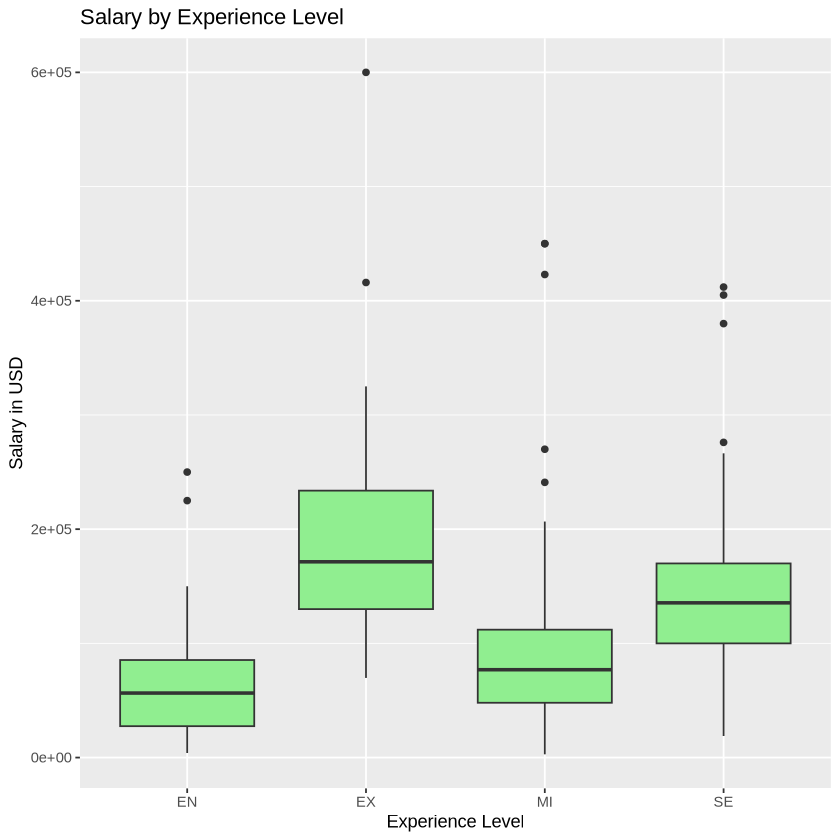

In [3]:
ggplot(salaries, aes(x = experience_level, y = salary_in_usd)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Salary by Experience Level", x = "Experience Level", y = "Salary in USD")

Entry-level employees **EN** have the lowest median salaries. Mid-level employees **MI** earn somewhat higher median salaries than entry-level, with some overlap between the two. Senior-level employees **SE** have a higher median salary than both entry and mid-levels, with minimal overlap with mid-level salaries. Executives **EX** have the highest median salaries overall, though there is some overlap with senior-level salaries. This progression shows a general increase in median salary with career advancement, despite slight overlaps at each level.

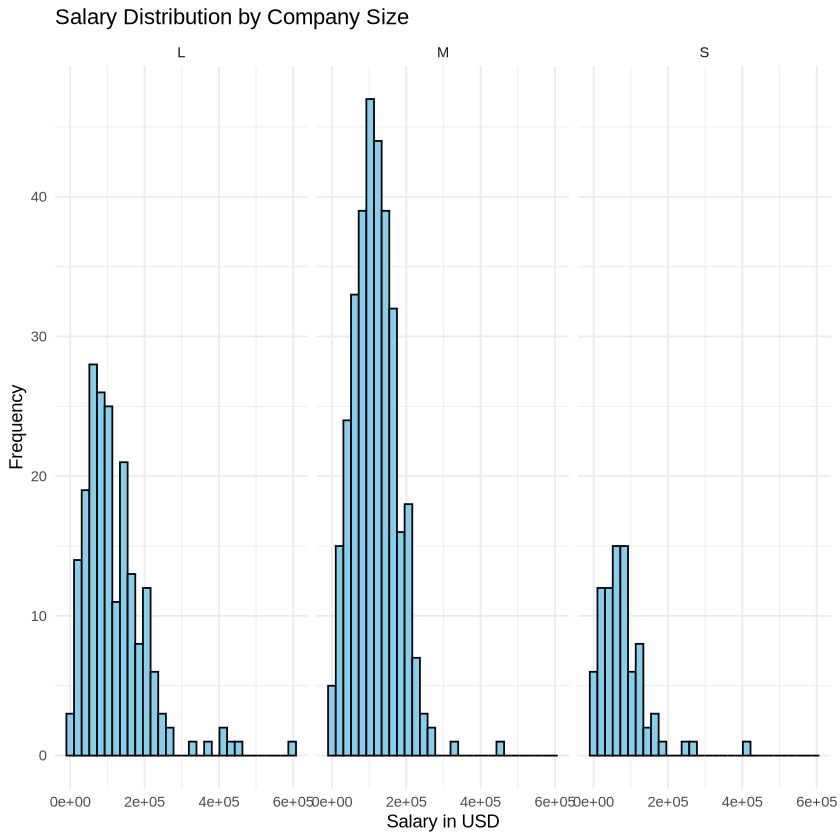

In [8]:
ggplot(salaries, aes(x = salary_in_usd)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  facet_wrap(~ company_size) +
  labs(title = "Salary Distribution by Company Size",
       x = "Salary in USD",
       y = "Frequency") +
  theme_minimal()

The average number of people that worked for the company during the year: **S**less than 50 employees (small) **M** 50 to 250 employees (medium) **L** more than 250 employees (large). We see that smaller sized companies have salaries that are generally lower, with fewer high-paying roles compared to larger companies. while larger sized companies, the distribution is broader, suggesting a wide range of salaries, with several employees earning higher salaries. Medium sized have the salaries are more concentrated around a specific range (e.g., around $200,000), suggesting less variation in pay.

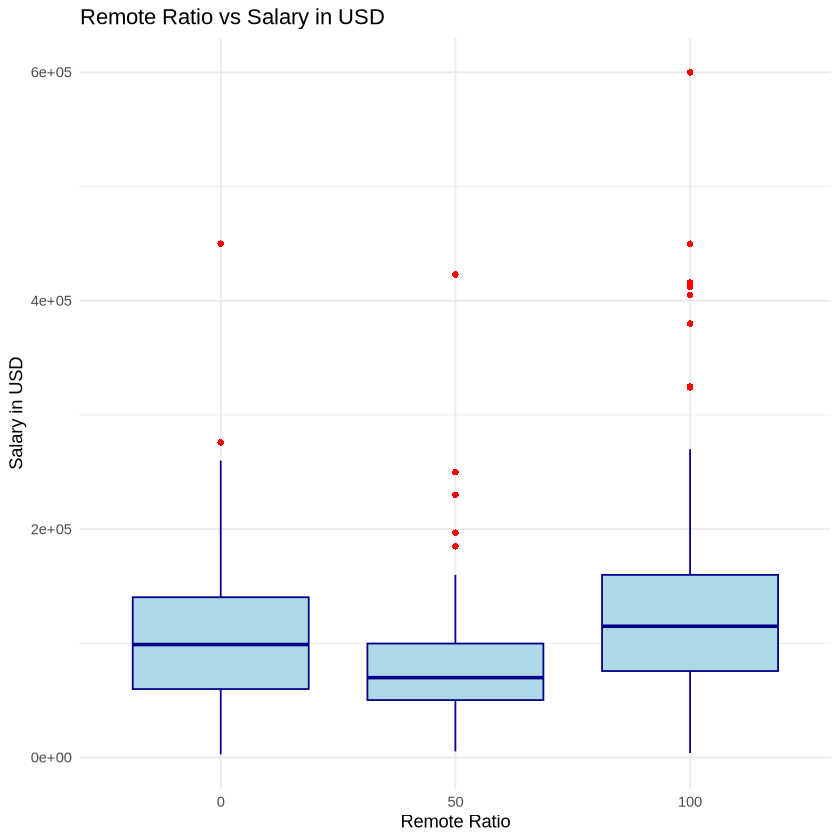

In [14]:
ggplot(salaries, aes(x = factor(remote_ratio), y = salary_in_usd)) +
  geom_boxplot(fill = "lightblue", color = "darkblue", outlier.shape = 16, outlier.color = "red") +
  ggtitle("Remote Ratio vs Salary in USD") +
  xlab("Remote Ratio") +
  ylab("Salary in USD") +
  theme_minimal()

Remote ratio variable: the amount of days employees work remotely, **0** indicating no remote work, **50** indicating half of their days working remotely and **100** indicating all days as remote work. We see that on average, people with **100%** of remote work, earn the most, while **0%** earning a little less than **100%**. The lowest average salary belongs to people who have a **50%** remote ratio.

**Methodological Plan**

Our analysis aims to predict data science salaries in USD through a structured methodology. We begin by cleaning the data, handling missing values, and encoding categorical variables such as `company_location` and `job_title` through feature engineering. For `company_location`, we group locations into continental categories, while `job_title` is simplified into broader roles to enhance predictive power. Next, we use forward selection to identify the most important features, iteratively adding predictors that minimize Mallows' Cp and optimize metrics like adjusted R² and AIC/BIC. Once the best features are selected, we fit an Ordinary Least Squares (OLS) regression model to quantify the relationships between the predictors and salaries, ensuring the model satisfies assumptions such as linearity, homoscedasticity, and absence of multicollinearity. We compare the performance of this reduced model to the full model using metrics such as Root Mean Squared Error (RMSE), R², and adjusted R² on both the training and test sets to assess its effectiveness. Cross-validation is also performed to evaluate how well the model generalizes to unseen data. These results justify the final model choice, ensuring it balances predictive accuracy, simplicity, and generalizability. This systematic approach combines feature engineering, model selection, and rigorous evaluation to uncover insights about the factors influencing data science salaries.

### Methods


In [5]:
# Main developer: Shaloo Menon # remove unnecessary variables
preprocessed_salaries <- salaries |>
  select(-c("...1", salary_currency, work_year, salary, employee_residence))

In [4]:
# feature engineering on company_location, job_title
no_am <- c("CA", "US", "MX", "HN")
so_am <- c("CL", "CO", "BR")
eur <- c("SI", "PL", "NL", "MT", "MO", "LU", "MD", "IT", "UA", 
         "IE", "HU", "HR", "GR", "GB", "FR", "ES", "EE", "DK", "DE", "AT", "BE", "CH", "CZ", "RO", "PT")
asia <- c("MY", "VN", "SG", "RU", "JP", "CN", "IN", "PK", "IL", "IQ", "IR", "TR", "AE")
afr <- c("KE", "DZ", "NG")
oce <- c("NZ", "AU", "AS")

In [5]:
# cont is the company location in terms of continent
preprocessed_salaries <- preprocessed_salaries %>%
    mutate(cont = "")

preprocessed_salaries[1, ]

experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,cont
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
MI,FT,Data Scientist,79833,0,DE,L,


In [6]:
for(i in 1:607){
    if(preprocessed_salaries[i, ]$company_location %in% no_am){
        preprocessed_salaries[i, ]$cont = "no_am"
    } else if(preprocessed_salaries[i, ]$company_location %in% so_am) {
        preprocessed_salaries[i, ]$cont = "so_am"
    } else if(preprocessed_salaries[i, ]$company_location %in% eur){
        preprocessed_salaries[i, ]$cont = "eur"
    } else if(preprocessed_salaries[i, ]$company_location %in% asia){
        preprocessed_salaries[i, ]$cont = "asia"
    } else if(preprocessed_salaries[i, ]$company_location %in% afr){
        preprocessed_salaries[i, ]$cont = "afr"
    } else if(preprocessed_salaries[i, ]$company_location %in% oce) {
        preprocessed_salaries[i, ]$cont = "oce"
    }
}

head(select(preprocessed_salaries, company_location, cont), 10)

company_location,cont
<chr>,<chr>
DE,eur
JP,asia
GB,eur
HN,no_am
US,no_am
US,no_am
US,no_am
HU,eur
US,no_am


In [7]:
counts <- preprocessed_salaries %>%
    group_by(job_title) %>%
    summarize(counts = n())

counts

job_title,counts
<chr>,<int>
3D Computer Vision Researcher,1
AI Scientist,7
Analytics Engineer,4
Applied Data Scientist,5
Applied Machine Learning Scientist,4
BI Data Analyst,6
Big Data Architect,1
Big Data Engineer,8
Business Data Analyst,5


In [8]:
# field will contain the job_title groupings
preprocessed_salaries <- preprocessed_salaries %>%
    mutate(field = "")

preprocessed_salaries[1, ]

experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,cont,field
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
MI,FT,Data Scientist,79833,0,DE,L,eur,


In [9]:
for(i in 1:607){
    if(str_detect(preprocessed_salaries$job_title[i], "Data Scien")) {
        preprocessed_salaries$field[i] = "Data Science"
    } else if(str_detect(preprocessed_salaries$job_title[i], "Data Analy")) {
        preprocessed_salaries$field[i] = "Data Analysis"       
    } else if(str_detect(preprocessed_salaries$job_title[i], "Machine Learning") || str_detect(preprocessed_salaries$job_title[i], "ML")){
        preprocessed_salaries$field[i] = "Machine Learning"
    } else if(str_detect(preprocessed_salaries$job_title[i], "Data Engineer")) {
        preprocessed_salaries$field[i] = "Data Engineering"
    } else {
        preprocessed_salaries$field[i] = "Other"
    }
}

head(select(preprocessed_salaries, job_title, field), 20)

job_title,field
<chr>,<chr>
Data Scientist,Data Science
Machine Learning Scientist,Machine Learning
Big Data Engineer,Data Engineering
Product Data Analyst,Data Analysis
Machine Learning Engineer,Machine Learning
Data Analyst,Data Analysis
Lead Data Scientist,Data Science
Data Scientist,Data Science
Business Data Analyst,Data Analysis


In [10]:
# Remove job_title and company_location
feat_salaries <- preprocessed_salaries %>%
    select(-job_title, -company_location)

# Convert all string parameters to factors
feat_salaries$company_size <- as.factor(feat_salaries$company_size)
feat_salaries$cont <- as.factor(feat_salaries$cont)
feat_salaries$field <- as.factor(feat_salaries$field)
feat_salaries$experience_level <- as.factor(feat_salaries$experience_level)
feat_salaries$employment_type <- as.factor(feat_salaries$employment_type)

head(feat_salaries)

experience_level,employment_type,salary_in_usd,remote_ratio,company_size,cont,field
<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>
MI,FT,79833,0,L,eur,Data Science
SE,FT,260000,0,S,asia,Machine Learning
SE,FT,109024,50,M,eur,Data Engineering
MI,FT,20000,0,S,no_am,Data Analysis
SE,FT,150000,50,L,no_am,Machine Learning
EN,FT,72000,100,L,no_am,Data Analysis


## Forward Selection

In [11]:
table(feat_salaries$field) # Main developer: Lily Xie


   Data Analysis Data Engineering     Data Science Machine Learning 
             131              158              192               68 
           Other 
              58 

In [12]:
# data splitting
set.seed(301)

# Perform the initial split (75% training, 25% testing by default,
# which is a suitable and common ratio for data splitting)
data_split <- initial_split(feat_salaries, prop = 0.75)

# Extract training and testing sets
train_data <- training(data_split)
test_data <- testing(data_split)

dim(train_data)
dim(test_data)

[1] 455   7

[1] 152   7

In [13]:
train_data[1, ]

experience_level,employment_type,salary_in_usd,remote_ratio,company_size,cont,field
<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>
SE,FT,140000,100,L,no_am,Data Analysis


In [14]:
# Determining total number of predictors, including dummy variables
model_matrix <- model.matrix(salary_in_usd ~ ., data = train_data)
# Display the dimensions of the model matrix
dim(model_matrix)

[1] 455  19

In [15]:
# Check the levels for each factor variable in the dataset
factor_levels <- sapply(train_data, function(x) if(is.factor(x)) levels(x) else NA)
factor_levels
# Checking the number of levels for each categorical variables
factor_levels_count <- sapply(train_data, function(x) if(is.factor(x)) length(levels(x)) else NA)
print(factor_levels_count)

$experience_level
[1] "EN" "EX" "MI" "SE"

$employment_type
[1] "CT" "FL" "FT" "PT"

$salary_in_usd
[1] NA

$remote_ratio
[1] NA

$company_size
[1] "L" "M" "S"

$cont
[1] "afr"   "asia"  "eur"   "no_am" "oce"   "so_am"

$field
[1] "Data Analysis"    "Data Engineering" "Data Science"     "Machine Learning"
[5] "Other"

experience_level  employment_type    salary_in_usd     remote_ratio 
               4                4               NA               NA 
    company_size             cont            field 
               3                6                5 


In [16]:
# Check how many coefficients (betas) you will have
num_coefficients <- ncol(model_matrix) - 1 # Subtract 1 to exclude the intercept
num_coefficients

[1] 18

Number of coefficients explained: each numeric variable gets one column/coefficient, each categorical variable gets (# of levels -1) dummy variables as coefficients (because reference level is not included), and yeah we get rid of the intercept column whuich is all 1. we have from the order of factor_levels: 3+3+1+1+2+5+4-1 = 18 coefficients in total.

In [17]:
# forward selection
forward_sel <- regsubsets(salary_in_usd ~ ., nvmax = 18,
                          data = train_data,
                          method = "forward")
forward_summary <- summary(forward_sel)
forward_summary

Subset selection object
Call: regsubsets.formula(salary_in_usd ~ ., nvmax = 18, data = train_data, 
    method = "forward")
18 Variables  (and intercept)
                      Forced in Forced out
experience_levelEX        FALSE      FALSE
experience_levelMI        FALSE      FALSE
experience_levelSE        FALSE      FALSE
employment_typeFL         FALSE      FALSE
employment_typeFT         FALSE      FALSE
employment_typePT         FALSE      FALSE
remote_ratio              FALSE      FALSE
company_sizeM             FALSE      FALSE
company_sizeS             FALSE      FALSE
contasia                  FALSE      FALSE
conteur                   FALSE      FALSE
contno_am                 FALSE      FALSE
contoce                   FALSE      FALSE
contso_am                 FALSE      FALSE
fieldData Engineering     FALSE      FALSE
fieldData Science         FALSE      FALSE
fieldMachine Learning     FALSE      FALSE
fieldOther                FALSE      FALSE
1 subsets of each size up to 

In [18]:
forward_summary_df <- tibble(
    n_input_variables = 1:18,
    RSQ = forward_summary$rsq,
    RSS = forward_summary$rss,
    ADJ_R2 = forward_summary$adjr2,
    Cp = forward_summary$cp,
    BIC = forward_summary$bic,
)
forward_summary_df

n_input_variables,RSQ,RSS,ADJ_R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2770677,1.769440e+12,0.2754718,137.08252,-135.3794
2,0.3379894,1.620328e+12,0.3350601,89.52462,-169.3146
3,0.3813322,1.514243e+12,0.3772169,56.26663,-194.0038
4,0.3898055,1.493504e+12,0.3843816,51.37383,-194.1583
5,0.3990691,1.470831e+12,0.3923772,45.83821,-194.9985
6,0.4060437,1.453760e+12,0.3980889,42.16460,-194.1900
7,0.4131925,1.436262e+12,0.4040031,38.34928,-193.5792
8,0.4186709,1.422854e+12,0.4082434,35.89281,-191.7267
9,0.4290902,1.397351e+12,0.4175437,29.41703,-193.8354


In [19]:
cp_min = which.min(forward_summary$cp) 
cp_min

selected_var <- names(coef(forward_sel, cp_min))[-1]
selected_var

[1] 17

[1] "experience_levelEX"    "experience_levelMI"    "experience_levelSE"   
 [4] "employment_typeFL"     "employment_typeFT"     "employment_typePT"    
 [7] "remote_ratio"          "company_sizeM"         "company_sizeS"        
[10] "contasia"              "contno_am"             "contoce"              
[13] "contso_am"             "fieldData Engineering" "fieldData Science"    
[16] "fieldMachine Learning" "fieldOther"

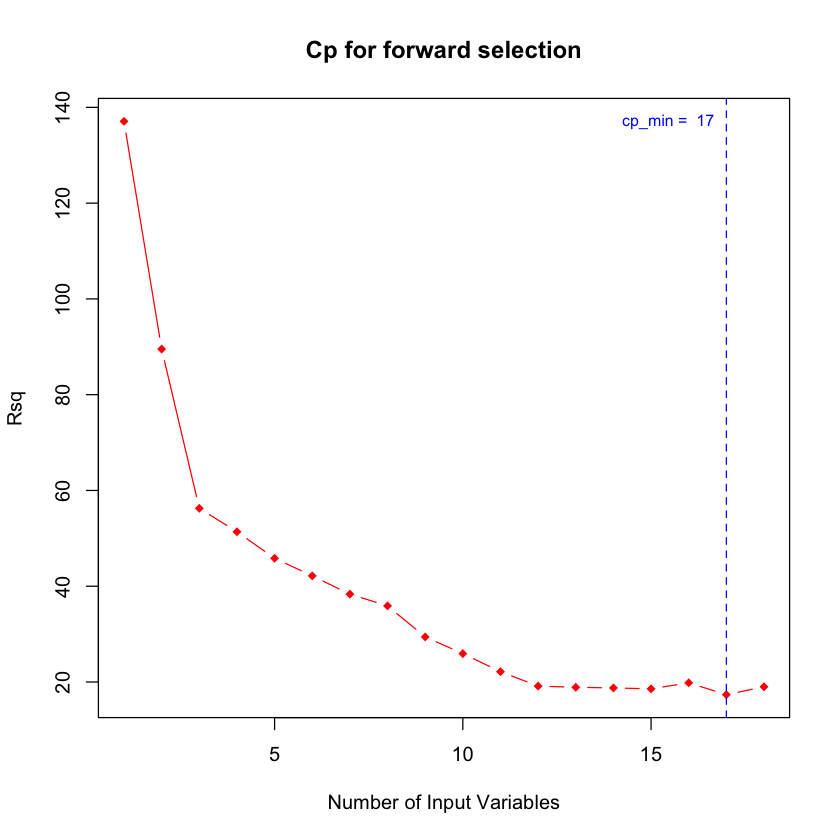

In [20]:
plot(summary(forward_sel)$cp,
     main = "Cp for forward selection",
     xlab = "Number of Input Variables", 
     ylab = "Rsq",
     type = "b",
     pch = 18,
     col = "red"
)
abline(v = cp_min, col = "blue", lty = 2)
text(cp_min, max(summary(forward_sel)$cp), 
     labels = paste("cp_min = ", round(cp_min, 2)), 
     pos = 2,  # Position to the right of the line
     col = "blue", 
     cex = 0.8)

In [21]:
# Configuring the training data matrix
# Remove intercept column (first column in the matrix)
train_no_int <- model_matrix[, -1]
training_subset <- as.data.frame(train_no_int) %>%
    bind_cols(salary_in_usd = train_data$salary_in_usd) %>%
    select(all_of(selected_var), salary_in_usd)
dim(training_subset)
head(training_subset)

[1] 455  18

,experience_levelEX,experience_levelMI,experience_levelSE,employment_typeFL,employment_typeFT,employment_typePT,remote_ratio,company_sizeM,company_sizeS,contasia,contno_am,contoce,contso_am,fieldData Engineering,fieldData Science,fieldMachine Learning,fieldOther,salary_in_usd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,1,0,100,0,0,0,1,0,0,0,0,0,0,140000
2,0,0,1,0,1,0,100,1,0,0,1,0,0,0,1,0,0,140000
3,0,1,0,0,1,0,100,0,0,0,1,0,0,0,0,0,0,135000
4,0,1,0,0,1,0,50,0,0,0,1,0,0,0,1,0,0,130000
5,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,39263
6,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,205300


In [22]:
# Fitting the reduced OLS using variables selected
forward_OLS <- lm(salary_in_usd ~ ., data = training_subset)

In [23]:
# Preparing the testing matrix (without modifying the content)
testing_matrix <- model.matrix(salary_in_usd ~ ., data = test_data)
test_no_int <- testing_matrix[, -1]
testing_subset <- as.data.frame(test_no_int)
missing_vars <- setdiff(selected_var, colnames(testing_subset))
if (length(missing_vars) > 0) {
  # Add missing columns for selected variables to the test set (set to zero for missing dummies)
  testing_subset[missing_vars] <- 0
}
testing_subset <- testing_subset %>%            
    bind_cols(salary_in_usd = test_data$salary_in_usd) %>%
    select(all_of(selected_var), salary_in_usd)
dim(testing_subset)
head(testing_subset)

[1] 152  18

,experience_levelEX,experience_levelMI,experience_levelSE,employment_typeFL,employment_typeFT,employment_typePT,remote_ratio,company_sizeM,company_sizeS,contasia,contno_am,contoce,contso_am,fieldData Engineering,fieldData Science,fieldMachine Learning,fieldOther,salary_in_usd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,260000
2,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,20000
3,0,0,0,0,1,0,100,0,0,0,1,0,0,0,0,0,0,72000
4,0,1,0,0,1,0,50,0,0,0,0,0,0,0,1,0,0,35735
5,0,1,0,0,1,0,100,0,0,0,1,0,0,0,0,0,0,87000
6,0,0,0,0,1,0,100,0,1,1,0,0,0,1,0,0,0,41689


In [24]:
test_data_final <- modelr::add_predictions(testing_subset, forward_OLS, var = "pred_red_OLS")

## OLS selected using Forward Selection, Model Evaluation

In [25]:
# Prevent scientific notation

options(scipen = 999)

# Calculate RMSE
rmse_test <- test_data_final %>%
    metrics(truth = salary_in_usd, estimate = pred_red_OLS) %>%
    filter(.metric == "rmse") %>%
    select(.estimate) %>%
    pull()

# Calculate R-squared
rsq_test <- test_data_final %>%
    metrics(truth = salary_in_usd, estimate = pred_red_OLS) %>%
    filter(.metric == "rsq") %>%
    select(.estimate) %>%
    pull()

n <- nrow(test_data)  
p <- length(selected_var)  

# Calculate Adjusted R-squared
adj_rsq_test <- 1 - ((1 - rsq_test) * (n - 1)) / (n - p - 1)

# Print results
results_table <- tibble(
  Metric = c("RMSE", "R-squared", "Adjusted R-squared"),
  Value = c(rmse_test, rsq_test, adj_rsq_test)
)
results_table

Metric,Value
<chr>,<dbl>
RMSE,48647.0980660
R-squared,0.4130371
Adjusted R-squared,0.3385716


In [ ]:
# Main Developer: Morgan 
full_model <- lm(salary_in_usd ~ ., data = train_data)

test_data_full <- modelr::add_predictions(test_data, full_model, var = "pred_full")

# Calculate RMSE for the full model
rmse_full <- test_data_full %>%
  metrics(truth = salary_in_usd, estimate = pred_full) %>%
  filter(.metric == "rmse") %>%
  select(.estimate) %>%
  pull()

# Calculate R-squared for the full model
rsq_full <- test_data_full %>%
  metrics(truth = salary_in_usd, estimate = pred_full) %>%
  filter(.metric == "rsq") %>%
  select(.estimate) %>%
  pull()

# Calculate Adjusted R-squared for the full model
adj_rsq_full <- 1 - ((1 - rsq_full) * (n - 1)) / (n - ncol(train_data) - 1)

# Print results for the full model
full_model_results <- tibble(
  Metric = c("RMSE", "R-squared", "Adjusted R-squared"),
  Value = c(rmse_full, rsq_full, adj_rsq_full)
)

# Combine results for comparison
comparison_results <- bind_rows(
  results_table %>% mutate(Model = "Reduced Model"),
  full_model_results %>% mutate(Model = "Full Model")
)

comparison_results

Metric,Value,Model
<chr>,<dbl>,<chr>
RMSE,48647.0980660,Reduced Model
R-squared,0.4130371,Reduced Model
Adjusted R-squared,0.3385716,Reduced Model
RMSE,48660.0508354,Full Model
R-squared,0.4118970,Full Model
Adjusted R-squared,0.3833087,Full Model


## Discussion

**Interpretation of Results**
The results provide key insights into the predictive performance of the reduced model compared to the full model in answering the research question: "Can we accurately predict salaries in USD based on different features in the data?"

**Root Mean Squared Error (RMSE):**

**Reduced Model RMSE: 48,647.10**
**Full Model RMSE: 48,660.05**
Both models have very similar RMSE values, indicating that the predictive accuracy of the reduced model is comparable to that of the full model. RMSE measures the average difference between the predicted and actual salaries, and a lower value is better. The small difference suggests that the reduced model achieves similar predictive performance with fewer predictors.
R-squared:

**Reduced Model R-squared: 0.413**
**Full Model R-squared: 0.412**
R-squared indicates the proportion of variance in salary that is explained by the predictors. Both models explain about 41% of the variance, showing that the selected features provide a reasonable explanation of salary variability, though there is still room for improvement. The reduced model performs slightly better, demonstrating that the additional features in the full model add little value.

**Adjusted R-squared:**

**Reduced Model Adjusted R-squared: 0.339**
**Full Model Adjusted R-squared: 0.383**
Adjusted R-squared penalizes models for adding unnecessary predictors. The full model has a higher adjusted R-squared, suggesting that its additional predictors improve the model fit after accounting for complexity. However, the difference is modest, implying that the full model's advantage in adjusted R-squared may not justify its complexity.


## References

Bhatia, Ruchi. “Data Science Job Salaries.” Kaggle, 15 June 2022, www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data. 

James, Gareth, et al. An Introduction to Statistical Learning: With Applications in R. Springer, 2022. 